#  Investigating Airplane Accidents

In this Assignment, we will clean and explore a dataset containing details about airplane accidents between January 1982 to September 2015.

The data provided for this assignment came in a text file where each entry was delimited by a new line. Each data point was separated by a pipe character. So, the first order of business will be to do some preliminary cleaning to get the data into a structure that we can work with.

In [115]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [1]:
opened = open('AviationData.txt' , "r")
aviation_list = []

for line in opened:
    line_list = line.split('|')
    words = []
    for word in line_list:
        word = word.strip()
        words.append(word)
    aviation_list.append(words)


In [2]:
print(aviation_list[1:3])

[['20150908X74637', 'Accident', 'CEN15LA402', '09/08/2015', 'Freeport, IL', 'United States', '42.246111', '-89.581945', 'KFEP', 'albertus Airport', 'Non-Fatal', 'Substantial', 'Unknown', 'N24TL', 'CLARKE REGINALD W', 'DRAGONFLY MK', '', '', '', 'Part 91: General Aviation', '', 'Personal', '', '', '1', '', '', 'VMC', 'TAKEOFF', 'Preliminary', '09/09/2015', ''], ['20150906X32704', 'Accident', 'ERA15LA339', '09/05/2015', 'Laconia, NH', 'United States', '43.606389', '-71.452778', 'LCI', 'Laconia Municipal Airport', 'Fatal(1)', 'Substantial', 'Weight-Shift', 'N2264X', 'EVOLUTION AIRCRAFT INC', 'REVO', 'No', '1', 'Reciprocating', 'Part 91: General Aviation', '', 'Personal', '', '1', '', '', '', 'VMC', 'MANEUVERING', 'Preliminary', '09/10/2015', '']]


Now that we have a list of list let see how fast we can retrieve information in our dataset.

In [3]:
lax_code = []

for x in aviation_list:
    for i in x:
        if i == "LAX94LA336":
            lax_code.append(x)


In [4]:
print(lax_code[0])

['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']


We are able to search the data for a particular value but the row we are returned is still pretty meaningless.
Plus, the algorithm we wrote on the previous screen took quadratic time. That's because it had to loop through each row first, and then each column inside that row.

There are ways to make the algorithm takes linear time while we still scan across the whole data set, though.

Let's write a linear time algorithm that searches each row in aviation_data for the string LAX94LA336. We know that the code we are looking for is in the third position of each list. 

In [5]:
lax_code2 = []

for x in aviation_list:
    if x[2] == "LAX94LA336":
            lax_code2.append(x)

print(lax_code2[0])

['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']


We don't need to loop through each element of each list but only to check the 3 rd one. This is faster but this implies that we know where the code could be situated in each list. Plus we still don't really understand most of the values from the row we are returned.

### Dictionnaries

Now let's store the data as a list of dictionaries, which will be a way to quickly know what each value of each row means 

In [7]:
opened = open('AviationData.txt' , "r")
aviation_dict_list = []

for line in opened:
    line_list = line.split('|')
    keys = []
    for i in aviation_list[0]:
        keys.append(i)

First we have created a list with all the keys, now let's create a new dictionnary for each row, with the same keys each time ( it's like the name of each columns of a DataFrame)

In [8]:
for i in range(1,len(aviation_list)):
    dic = {}
    for x in range(0,len(keys)):
        dic[keys[x]] = aviation_list[i][x]
    aviation_dict_list.append(dic)

Now let's search for our Accident Number

In [9]:
lax_dict = []

for i in aviation_dict_list:
    if i['Accident Number'] == 'LAX94LA336':
        lax_dict.append(i)      

In [10]:
print(lax_dict[0])

{'Event Id': '20001218X45447', 'Investigation Type': 'Accident', 'Accident Number': 'LAX94LA336', 'Event Date': '07/19/1962', 'Location': 'BRIDGEPORT, CA', 'Country': 'United States', 'Latitude': '', 'Longitude': '', 'Airport Code': '', 'Airport Name': '', 'Injury Severity': 'Fatal(4)', 'Aircraft Damage': 'Destroyed', 'Aircraft Category': '', 'Registration Number': 'N5069P', 'Make': 'PIPER', 'Model': 'PA24-180', 'Amateur Built': 'No', 'Number of Engines': '1', 'Engine Type': 'Reciprocating', 'FAR Description': '', 'Schedule': '', 'Purpose of Flight': 'Personal', 'Air Carrier': '', 'Total Fatal Injuries': '4', 'Total Serious Injuries': '0', 'Total Minor Injuries': '0', 'Total Uninjured': '0', 'Weather Condition': 'UNK', 'Broad Phase of Flight': 'UNKNOWN', 'Report Status': 'Probable Cause', 'Publication Date': '09/19/1996', '': ''}


The time of search is linear as we only have to go through one element of each dictionnary (with the 'Accident Number') and not through the whole dataset and we know have much more information!

### Exploring the Data

Now we'll count how many accidents occurred in each U.S. state, then determine which state had the most accidents overall.

In [100]:
for dic in aviation_dict_list[30:50]:
    location = dic["Location"]
    print(location)


Titusville, FL
Pine Bluff, AR
Orlando, FL
Tyler, MN
Ketchum, OK
Pineville, LA
Mesa, AZ
Springfield, OH
Lac Long, Canada
Pontiac, MI
Hempstead, TX
El Dorado, AR
Kasilof, AK
HOMER, AK
LaBelle, FL
Danbury, CT
Tucson, AZ
Harvey, ND
Ironside, OR
Helena, MT


We can see that the US states are represented by the last two letters. However when it's another country the name is written fully (ex: Canada)

In [101]:
states = []

for dic in aviation_dict_list:
    #We make sure that we are only taking the accident that occured in the USA
    if dic['Country'] == 'United States':
        location = dic["Location"]
        # We only keep the last 2 letters, that indicates the State.
        location = location[-2:]
        states.append(location)
    states = list(dict.fromkeys(states))

states = sorted(states)[1:]
print(states)

['AK', 'AL', 'AO', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FN', 'GA', 'GM', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR', 'PA', 'PO', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UN', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


Quite surprinsigly we have 63 states. As United States did not envade any new territories, it might be a mistake. We will see quickly after wich states are false.

Let's create a dictionnary that gather the sum of accident per state

In [106]:
#We create a dictionnary with each unique value of the state list
states_dic = dict.fromkeys(states)

states_accidents = {}

for key in states_dic:
    states_accidents[key] = 0
    
#We make sure that we are only taking the accident that occured in the USA
for dic in aviation_dict_list:
    if dic['Country'] == 'United States':
        location = dic["Location"]
        # We only keep the last 2 letters, that indicates the State.
        location = location[-2:]  
        #Each time an accident in a state occurs, we had +1 to it's value, which will give the final number of accident per state
        if location in states_accidents:
            states_accidents[location] += 1
            
#We sort our dictionnary by values, descending)
states_accidents = {k: v for k, v in sorted(states_accidents.items(), key=lambda item: item[1],reverse = True)}

In [107]:
print(states_accidents)

{'CA': 8030, 'FL': 5118, 'TX': 5112, 'AK': 5049, 'AZ': 2502, 'CO': 2460, 'WA': 2354, 'IL': 1874, 'MI': 1863, 'GA': 1747, 'NY': 1716, 'OH': 1616, 'PA': 1573, 'OR': 1559, 'NC': 1433, 'MO': 1404, 'AR': 1389, 'WI': 1389, 'MN': 1317, 'ID': 1228, 'NM': 1219, 'IN': 1169, 'UT': 1162, 'OK': 1110, 'VA': 1108, 'LA': 1073, 'NJ': 1068, 'NV': 1054, 'AL': 1032, 'KS': 981, 'TN': 951, 'MT': 936, 'MA': 896, 'SC': 850, 'MS': 746, 'IA': 731, 'MD': 720, 'WY': 663, 'NE': 642, 'KY': 577, 'ND': 514, 'ME': 458, 'CT': 447, 'HI': 434, 'SD': 393, 'WV': 362, 'NH': 326, 'VT': 213, 'RI': 147, 'DE': 100, 'PR': 88, 'GM': 63, 'DC': 43, 'GU': 14, 'VI': 12, 'PO': 8, 'AO': 7, 'FN': 5, 'UN': 5, 'MP': 2, 'AS': 1, 'ON': 1}


In [108]:
max_accident_state = max(states_accidents, key=states_accidents.get)
max_accident_state

'CA'

The state with most accident is California, by far. Let's see if it's also the deadliest one.

We use the same technique as above

In [109]:
fatal_states = dict.fromkeys(states)

for key in fatal_states:
    fatal_states[key] = 0
    
for i in range(len(aviation_dict_list)):
    #We replace missing values to avoid any mistakes
    if aviation_dict_list[i]['Total Fatal Injuries'] == '':
        aviation_dict_list[i]['Total Fatal Injuries'] = 0

for dic in aviation_dict_list:
    if dic['Country'] == 'United States':
        location = dic["Location"]
        location = location[-2:]  
        if location in states_dic:
            fatal_states[location] += int(dic['Total Fatal Injuries'])

fatal_states = {k: v for k, v in sorted(fatal_states.items(), key=lambda item: item[1],reverse = True)}

In [110]:
print(fatal_states)

{'CA': 3676, 'FL': 1779, 'TX': 1734, 'NY': 1331, 'AK': 1172, 'AZ': 946, 'CO': 944, 'PA': 751, 'WA': 749, 'MI': 746, 'GA': 733, 'NC': 629, 'VA': 562, 'OR': 521, 'IL': 518, 'LA': 505, 'OH': 498, 'NV': 475, 'WI': 469, 'UT': 465, 'OK': 454, 'NM': 434, 'AL': 431, 'ID': 429, 'MO': 424, 'AR': 420, 'IN': 394, 'NJ': 371, 'MN': 369, 'TN': 369, 'MT': 335, 'IA': 317, 'SC': 316, 'MA': 288, 'KY': 286, 'KS': 260, 'HI': 252, 'WY': 251, 'MD': 246, 'GU': 233, 'MS': 218, 'NE': 195, 'WV': 170, 'CT': 153, 'ME': 150, 'SD': 141, 'NH': 102, 'DC': 85, 'VT': 82, 'ND': 73, 'RI': 64, 'PR': 45, 'DE': 39, 'GM': 28, 'VI': 8, 'MP': 4, 'PO': 4, 'AS': 2, 'FN': 2, 'ON': 2, 'AO': 1, 'UN': 1}


In [111]:
most_fatal_states = max(fatal_states, key=fatal_states.get)
most_fatal_states

'CA'

Logically this number is still higher for California.

### Monthly Injuries

Let's count how many fatalities and serious injuries occured during each unique month and year.

In [112]:
month = []

#First of all we need to extract the Month and Year of every accident
for dic in aviation_dict_list:
    event_date = dic['Event Date']
    event_date = event_date[0:3] + event_date[6:]
    event_date = event_date[0:2] + '-' + event_date[-4:] 
    month.append(str(event_date))
    
    
month = list(dict.fromkeys(month))
month_sorted = sorted(month)[1:]

In [114]:
# We get all the unique values to create a dictionnary
injuries_month = dict.fromkeys(month)

for key in injuries_month:
    injuries_month[key] = 0
    
#We get rid of the null values
for i in range(len(aviation_dict_list)):
    if aviation_dict_list[i]['Total Fatal Injuries'] == '':
        aviation_dict_list[i]['Total Fatal Injuries'] = 0
    if aviation_dict_list[i]['Total Serious Injuries'] == '':
        aviation_dict_list[i]['Total Serious Injuries'] = 0   

#We create a dictionnary with the month as keys and the number of fatal and serious injuries as values        
for dic in aviation_dict_list:
    event_date = dic['Event Date']
    event_date = event_date[0:3] + event_date[6:]
    event_date = str(event_date[0:2] + '-' + event_date[-4:])
    if event_date in injuries_month:
        injuries_month[event_date] += (int(dic['Total Fatal Injuries']) + int(dic['Total Serious Injuries']))

# Let's erase a few values that are too far from the other to have a better graph later
del injuries_month['-']
del injuries_month['08-1974']
del injuries_month['07-1962']
del injuries_month['10-1948']

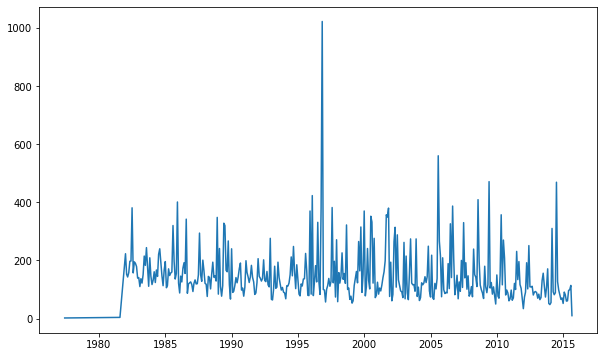

In [118]:
#We create two list out of the keys and the values of our dictionnary to create the graph
casualties_list =  list(injuries_month.values()) 
month_list = list(injuries_month.keys()) 

#we convert our month to datetime, this will help us displaying the time on the x-axis
month_dt = [datetime.strptime(v , '%m-%Y')
 for v in month_list]

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(month_dt,casualties_list)

plt.show()

It seems that there are a lot of variations in the number of deaths depending on the months. Let's see if certain month are deadlier than the other, maybe link to weather conditions at a specific time of the year.

In [119]:
month_only_dic = {}
letter_month = []
month_only = []

#This time we only keep the month, and not the year, as we want to see if EVERY month of each year we have some tendencies
for dic in aviation_dict_list:
    mo = dic['Event Date']
    mo = mo[0:2]
    month_only.append(str(mo))
    
    
month_only = list(dict.fromkeys(month_only))
month_only_sorted = sorted(month_only)[1:]


In [120]:
injuries_month_only = dict.fromkeys(month_only_sorted )

for key in injuries_month_only:
    injuries_month_only[key] = 0

#For more readibility we will use letter to design our months
calend = {'Jan' : '01',
        'Feb' : '02',
        'Mar' : '03',
        'Apr' : '04',
        'May' : '05',
        'Jun' : '06',
        'Jul' : '07',
        'Aug' : '08',
        'Sep' : '09', 
        'Oct' : '10',
        'Nov' : '11',
        'Dec' : '12'}     

for dic in aviation_dict_list:
    mo = dic['Event Date']
    mo = mo[0:2] 
    if mo in injuries_month_only:
        injuries_month_only[mo] += (int(dic['Total Fatal Injuries']) + int(dic['Total Serious Injuries']))
        
for key,val in calend.items():
    injuries_month_only[key] = injuries_month_only.pop(val)

<BarContainer object of 12 artists>

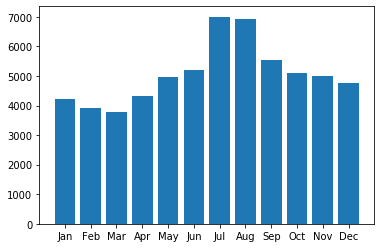

In [121]:
plt.bar(injuries_month_only.keys(),injuries_month_only.values())


It seems that the July and August months are the deadliest one, which makes sense as it represents the holidays and we can assume that much more people are travelling, thus more planes are flying.

To go even further we should calculate the ratio between the number of flight and the number of casualties, which might gives us an idea of which month is more "dangerous". Unfortunately we do not have the data about the number of flight per month, but only about the accidents.